In [1]:
!git clone https://github.com/KushajveerSingh/ds_cup

fatal: destination path 'ds_cup' already exists and is not an empty directory.


In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [2]:
smallestF =  np.finfo('float').eps # smallest float value (numpy), will be used later

In [3]:
path = Path('../data_orig')
# path = Path('ds_cup/orig_data')
orig_train_df = pd.read_csv(path/'train.csv')
orig_valid_df = pd.read_csv(path/'valid.csv')
orig_test_df = pd.read_csv(path/'test.csv')

In [4]:
def print_size(df, name):
    counts = df['Default_ind'].value_counts()
    print(f'{name} dataset')
    print(f'Num 0 values = {counts[0]}')
    print(f'Num 1 values = {counts[1]}')
    print()

In [5]:
print_size(orig_train_df, 'train')
print_size(orig_valid_df, 'valid')
print_size(orig_test_df, 'test')

train dataset
Num 0 values = 18414
Num 1 values = 1586

valid dataset
Num 0 values = 2778
Num 1 values = 222

test dataset
Num 0 values = 4599
Num 1 values = 401



In [6]:
orig_train_df.isnull().sum()

tot_credit_debt                          0
avg_card_debt                            0
credit_age                               0
credit_good_age                          0
card_age                                 0
non_mtg_acc_past_due_12_months_num       0
non_mtg_acc_past_due_6_months_num        0
mortgages_past_due_6_months_num          0
credit_past_due_amount                   0
inq_12_month_num                         0
card_inq_24_month_num                    0
card_open_36_month_num                   0
auto_open_ 36_month_num                  0
uti_card                                 0
uti_50plus_pct                           0
uti_max_credit_line                      0
uti_card_50plus_pct                   2055
ind_acc_XYZ                              0
rep_income                            1570
States                                   0
Default_ind                              0
dtype: int64

In [7]:
#def binColumn(col):
def binColumn(col,threshArr):
    assert col.isnull().all() != True, "All values are null?"
    def binVal(val):
        loc = 1
        for x in threshArr:
            if(val<=x):
                return loc
            else:
                loc = loc+1
        return loc

    col.fillna(0,inplace=True) #Dont worry about -ve values
    threshArr = np.sort(np.array(threshArr))
    #Replace Nulls with 0 if any
    theBinnedCol = []
    for val in col:
        theBinnedCol.extend([binVal(val)])
        #theCol.update(pd.Series([], index=[ind]))
    return pd.Series(theBinnedCol,index=col.keys())

In [8]:
def createThreshDict(colName,Arr):
    _dict = {}
    _dict['colName'] = colName
    _dict['ThreshArr'] = Arr
    return _dict
DFThresh =  pd.DataFrame(columns=createThreshDict("",[]).keys())

- Going through all columns one by one and applying binning and solving Null Problems

In [9]:
#orig_train_df = orig_train_df.sample(frac=1) #Shuffling the dataset before using
#orig_valid_df = orig_valid_df.sample(frac=1) #Shuffling the dataset before using
#orig_test_df = orig_test_df.sample(frac=1) #Shuffling the dataset before using
train_df = pd.DataFrame(columns=orig_train_df.columns)
#valid_df = pd.DataFrame(columns=orig_valid_df.columns)
#test_df = pd.DataFrame(columns=orig_valid_df.columns)

In [10]:
orig_train_df.columns

Index(['tot_credit_debt', 'avg_card_debt', 'credit_age', 'credit_good_age',
       'card_age', 'non_mtg_acc_past_due_12_months_num',
       'non_mtg_acc_past_due_6_months_num', 'mortgages_past_due_6_months_num',
       'credit_past_due_amount', 'inq_12_month_num', 'card_inq_24_month_num',
       'card_open_36_month_num', 'auto_open_ 36_month_num', 'uti_card',
       'uti_50plus_pct', 'uti_max_credit_line', 'uti_card_50plus_pct',
       'ind_acc_XYZ', 'rep_income', 'States', 'Default_ind'],
      dtype='object')

## - tot_credit_debt

In [11]:
_col = 'tot_credit_debt'
_thresh = orig_train_df[_col].quantile([0.2,0.4,0.6,0.8]).to_numpy()
DFThresh = DFThresh.append(createThreshDict(_col,
    _thresh),
    ignore_index=True) 
train_df[_col] = binColumn(orig_train_df[_col],_thresh)

## - avg_card_debt

In [12]:
cutoff_avg_card_debt = (13167.825020 + 99999.0)/2
cutoff_avg_card_debt

56583.41251

In [13]:
#13167.825 (cutoff) is max value of lower cluster and 99999 is value of next one
orig_train_df[orig_train_df.avg_card_debt > cutoff_avg_card_debt]['avg_card_debt'].describe(),orig_train_df[orig_train_df.avg_card_debt < cutoff_avg_card_debt]['avg_card_debt'].describe()

(count      212.0
 mean     99999.0
 std          0.0
 min      99999.0
 25%      99999.0
 50%      99999.0
 75%      99999.0
 max      99999.0
 Name: avg_card_debt, dtype: float64,
 count    19788.000000
 mean     13167.825020
 std       2786.580027
 min       2363.120000
 25%      11295.780000
 50%      13206.065000
 75%      15126.282500
 max      19960.610000
 Name: avg_card_debt, dtype: float64)

Column = avg_card_debt


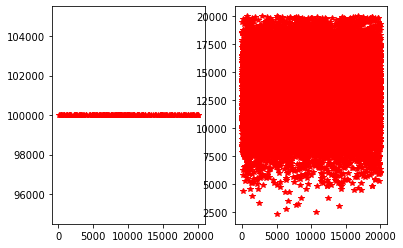

In [14]:
print('Column = avg_card_debt')
fig, ax = plt.subplots(1,2)
ax[0].plot(orig_train_df[orig_train_df.avg_card_debt > cutoff_avg_card_debt]['avg_card_debt'],'ro',marker='*',)
ax[1].plot(orig_train_df[orig_train_df.avg_card_debt < cutoff_avg_card_debt]['avg_card_debt'],'ro',marker='*',)
plt.show()

In [15]:
_col = 'avg_card_debt'
_thresh = orig_train_df[orig_train_df.avg_card_debt < cutoff_avg_card_debt]['avg_card_debt'].quantile([0.2,0.4,0.6,0.8]).to_numpy()
_thresh = np.append(_thresh, [cutoff_avg_card_debt])
DFThresh = DFThresh.append(createThreshDict(_col,
    _thresh),
    ignore_index=True) 
train_df[_col] = binColumn(orig_train_df[_col],_thresh)

## - credit_age

In [16]:
_col = 'credit_age'
_thresh = orig_train_df[_col].quantile([0.2,0.4,0.6,0.8]).to_numpy()
DFThresh = DFThresh.append(createThreshDict(_col,
    _thresh),
    ignore_index=True) 
train_df[_col] = binColumn(orig_train_df[_col],_thresh)

## - credit_good_age

In [17]:
_col = 'credit_good_age'
_thresh = orig_train_df[_col].quantile([0.2,0.4,0.6,0.8]).to_numpy()
DFThresh = DFThresh.append(createThreshDict(_col,
    _thresh),
    ignore_index=True) 
train_df[_col] = binColumn(orig_train_df[_col],_thresh)

## - card_age

In [18]:
_col = 'card_age'
_thresh = orig_train_df[_col].quantile([0.2,0.4,0.6,0.8]).to_numpy()
DFThresh = DFThresh.append(createThreshDict(_col,
    _thresh),
    ignore_index=True) 
train_df[_col] = binColumn(orig_train_df[_col],_thresh)

## - non_mtg_acc_past_due_12_months_num

In [19]:
print(orig_train_df.non_mtg_acc_past_due_12_months_num.value_counts()) #Already binned
train_df['non_mtg_acc_past_due_12_months_num'] = orig_train_df['non_mtg_acc_past_due_12_months_num'].copy()

0.0    18502
1.0      918
2.0      446
3.0      119
4.0       15
Name: non_mtg_acc_past_due_12_months_num, dtype: int64


## - non_mtg_acc_past_due_6_months_num

In [20]:
print(orig_train_df.non_mtg_acc_past_due_6_months_num.value_counts()) #Already Binned
train_df['non_mtg_acc_past_due_6_months_num'] = orig_train_df['non_mtg_acc_past_due_6_months_num'].copy()

0.0    19481
1.0      490
2.0       29
Name: non_mtg_acc_past_due_6_months_num, dtype: int64


## - mortgages_past_due_6_months_num

In [21]:
print(orig_train_df.mortgages_past_due_6_months_num.value_counts()) #Already Binned
train_df['mortgages_past_due_6_months_num'] = orig_train_df['mortgages_past_due_6_months_num'].copy()

0.0    19396
1.0      604
Name: mortgages_past_due_6_months_num, dtype: int64


## - credit_past_due_amount

In [22]:
orig_train_df.credit_past_due_amount.describe() #Binning Problem, 0 must be seperate

count    20000.000000
mean       329.287867
std       2073.899357
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      32662.980000
Name: credit_past_due_amount, dtype: float64

In [23]:
orig_train_df[orig_train_df.credit_past_due_amount > 0].credit_past_due_amount.describe() #Binning Problem, 0 must be seperate

count      604.000000
mean     10903.571755
std       5211.481467
min        316.390000
25%       7336.110000
50%      10044.305000
75%      13671.332500
max      32662.980000
Name: credit_past_due_amount, dtype: float64

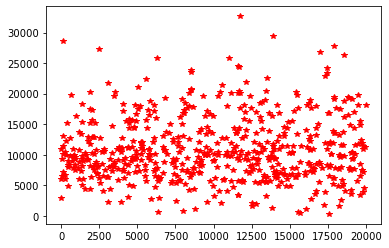

In [24]:
plt.plot(orig_train_df.credit_past_due_amount[orig_train_df.credit_past_due_amount > 0],'ro',marker='*')
plt.show()

In [25]:
_col = 'credit_past_due_amount'
_thresh = orig_train_df[orig_train_df.credit_past_due_amount > 0][_col].quantile([0.2,0.4,0.6,0.8]).to_numpy()
_thresh = np.insert(_thresh, 0, 0+smallestF)
DFThresh = DFThresh.append(createThreshDict(_col,
    _thresh),
    ignore_index=True) 
train_df[_col] = binColumn(orig_train_df[_col],_thresh)

## - inq_12_month_num

In [26]:
_col = 'inq_12_month_num'
_thresh = orig_train_df[_col].quantile([0.2,0.4,0.6,0.8]).to_numpy()
DFThresh = DFThresh.append(createThreshDict(_col,
    _thresh),
    ignore_index=True) 
train_df[_col] = binColumn(orig_train_df[_col],_thresh)

## - card_inq_24_month_num

In [27]:
_col = 'card_inq_24_month_num'
_thresh = orig_train_df[_col].quantile([0.2,0.4,0.6,0.8]).to_numpy()
DFThresh = DFThresh.append(createThreshDict(_col,
    _thresh),
    ignore_index=True) 
train_df[_col] = binColumn(orig_train_df[_col],_thresh)

## - card_open_36_month_num  

In [28]:
_col = 'card_open_36_month_num'
print(orig_train_df[_col].value_counts()) #Already Binned
train_df[_col] = orig_train_df[_col].copy()

0.0    16865
1.0     3009
2.0      126
Name: card_open_36_month_num, dtype: int64


## - auto_open_36_month_num

In [29]:
_col = 'auto_open_ 36_month_num'
print(orig_train_df[_col].value_counts()) #Already Binned
train_df[_col] = orig_train_df[_col].copy()

0.0    17191
1.0     2798
2.0       11
Name: auto_open_ 36_month_num, dtype: int64


## - uti_card

In [30]:
_col = 'uti_card'
_thresh = orig_train_df[_col].quantile([0.2,0.4,0.6,0.8]).to_numpy()
DFThresh = DFThresh.append(createThreshDict(_col,
    _thresh),
    ignore_index=True) 
train_df[_col] = binColumn(orig_train_df[_col],_thresh)

## - uti_50plus_pct

In [31]:
_col = 'uti_50plus_pct'
_thresh = orig_train_df[_col].quantile([0.2,0.4,0.6,0.8]).to_numpy()
DFThresh = DFThresh.append(createThreshDict(_col,
    _thresh),
    ignore_index=True) 
train_df[_col] = binColumn(orig_train_df[_col],_thresh)

## - uti_max_credit_line

In [32]:
_col = 'uti_max_credit_line'
_thresh = orig_train_df[_col].quantile([0.2,0.4,0.6,0.8]).to_numpy()
DFThresh = DFThresh.append(createThreshDict(_col,
    _thresh),
    ignore_index=True) 
train_df[_col] = binColumn(orig_train_df[_col],_thresh)

## - uti_card_50plus_pct

In [33]:
_col = 'uti_card_50plus_pct'
_thresh = orig_train_df[_col].quantile([0.2,0.4,0.6,0.8]).to_numpy()
DFThresh = DFThresh.append(createThreshDict(_col,
    _thresh),
    ignore_index=True) 
train_df[_col] = binColumn(orig_train_df[_col],_thresh)

## - ind_acc_XYZ

In [34]:
_col = 'ind_acc_XYZ'
print(orig_train_df[_col].value_counts()) #Already Binned
train_df[_col] = orig_train_df[_col].copy()

0.0    14829
1.0     5171
Name: ind_acc_XYZ, dtype: int64


## - rep_income

In [35]:
_col = 'rep_income'
_thresh = orig_train_df[_col].quantile([0.2,0.4,0.6,0.8]).to_numpy()
DFThresh = DFThresh.append(createThreshDict(_col,
    _thresh),
    ignore_index=True) 
train_df[_col] = binColumn(orig_train_df[_col],_thresh)

## - States

In [36]:
_col = 'States'
#
train_df.drop(columns=[_col],inplace=True,errors='ignore')
train_df.insert(0,_col,orig_train_df[_col].copy())
#
enc = OneHotEncoder(handle_unknown='ignore',sparse = False)
SM = enc.fit_transform(orig_train_df[_col].to_numpy().reshape(-1,1)) #Got it!
for ind,cat in zip(range(0,len(enc.categories_[0])),enc.categories_[0]):
    train_df.drop(columns=['is'+str(cat)],inplace=True,errors='ignore')
    train_df.insert(0,'is'+str(cat), SM[:,ind]) # Inserted column names are isAK, isAL, isDC..etc. 
   #And it will contain 0 if that is not the state and 1 if that is the state,
#train_df.drop(columns=[_col],inplace=True) #Remove States Column

## - Default_ind (Output Column)

In [37]:
_col = 'Default_ind'
print(orig_train_df[_col].value_counts()) #Already Binned
train_df[_col] = orig_train_df[_col].copy()

0.0    18414
1.0     1586
Name: Default_ind, dtype: int64


In [38]:
train_df

,isSC,isNC,isMS,isLA,isGA,isFL,isAL,States,tot_credit_debt,avg_card_debt,...,card_inq_24_month_num,card_open_36_month_num,auto_open_ 36_month_num,uti_card,uti_50plus_pct,uti_max_credit_line,uti_card_50plus_pct,ind_acc_XYZ,rep_income,Default_ind
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,AL,2,5,...,3,0.0,0.0,1,2,1,1,0.0,2,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,FL,3,2,...,3,1.0,0.0,4,4,4,4,0.0,1,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,AL,2,2,...,3,0.0,1.0,1,1,1,2,0.0,1,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,SC,1,1,...,1,1.0,0.0,2,2,3,3,0.0,3,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,LA,1,1,...,2,0.0,0.0,5,5,4,4,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,GA,4,3,...,3,0.0,0.0,2,4,2,3,1.0,1,0.0
19996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NC,2,1,...,1,0.0,0.0,5,3,5,1,0.0,4,0.0
19997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,SC,4,5,...,3,0.0,1.0,3,4,1,3,0.0,2,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,AL,2,2,...,2,0.0,0.0,1,1,1,1,0.0,2,0.0


In [43]:
DFThresh

,colName,ThreshArr
0,tot_credit_debt,"[74775.864, 88648.24799999999, 100510.408, 114..."
1,avg_card_debt,"[10820.814000000002, 12495.228, 13919.132, 156..."
2,credit_age,"[244.0, 281.0, 312.0, 349.0]"
3,credit_good_age,"[121.0, 141.0, 159.0, 178.0]"
4,card_age,"[217.0, 253.0, 283.0, 318.0]"
5,credit_past_due_amount,"[2.220446049250313e-16, 6740.4580000000005, 90..."
6,inq_12_month_num,"[0.0, 1.0, 2.0, 3.0]"
7,card_inq_24_month_num,"[1.0, 2.0, 4.0, 6.0]"
8,uti_card,"[0.41157646256963687, 0.4757173660339531, 0.53..."
9,uti_50plus_pct,"[0.4160113878170562, 0.48245208670107603, 0.53..."


In [47]:
train_df.to_csv(path/'train_binned.csv',index=None)
DFThresh.to_csv(path/'Thresholds.csv',index=None)